In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re                #Regular exp: To find rephrase particular phrases
import string            #String function: To get info from string
import nltk              #natural languange processing toolkit
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('Twitter_Sentiment.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [46]:
#DataTypes info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Data Preprocessing

In [47]:
#remove pattern in input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, '', input_txt)
    return input_txt

In [48]:
#remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [49]:
#remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [50]:
#remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [51]:
 #individual words considered as tokens
 tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
 tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [52]:
#stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [53]:
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [54]:
#combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [55]:
import pandas as pd
import unicodedata
import re

def remove_special_characters(text):
    # Normalize text to remove non-ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove other special characters but preserve hashtags
    text = re.sub(r'[^\w\s#]', '', text)
    return text

# Apply the function to the clean_tweet column
df['clean_tweet'] = df['clean_tweet'].apply(remove_special_characters)

df.head()



,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cant caus they dont offer w...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time ur
4,5,0,factsguide: society now #motivation,factsguide societi #motiv


EDA

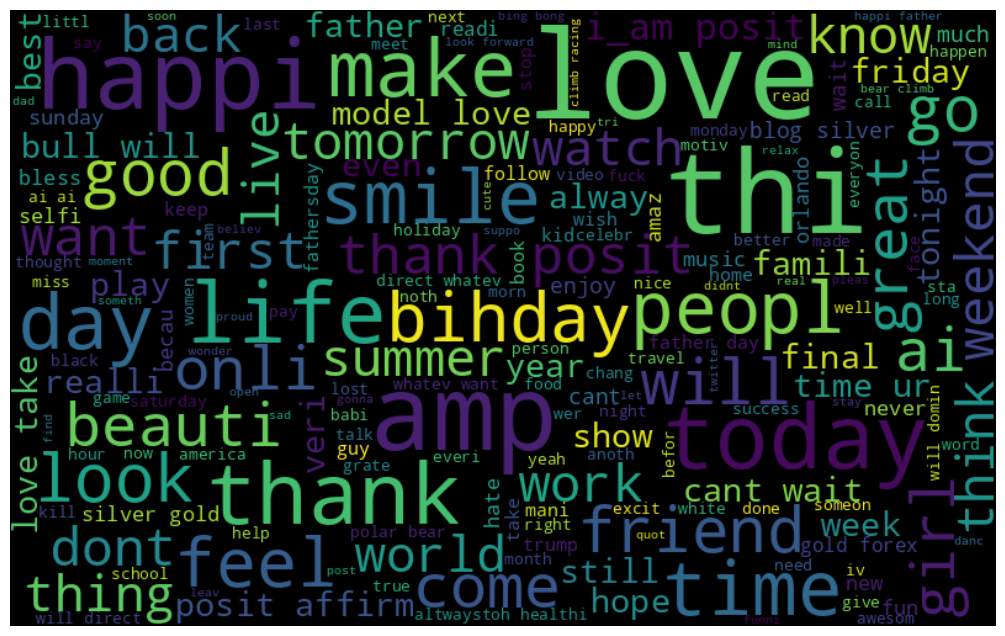

In [56]:
#visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

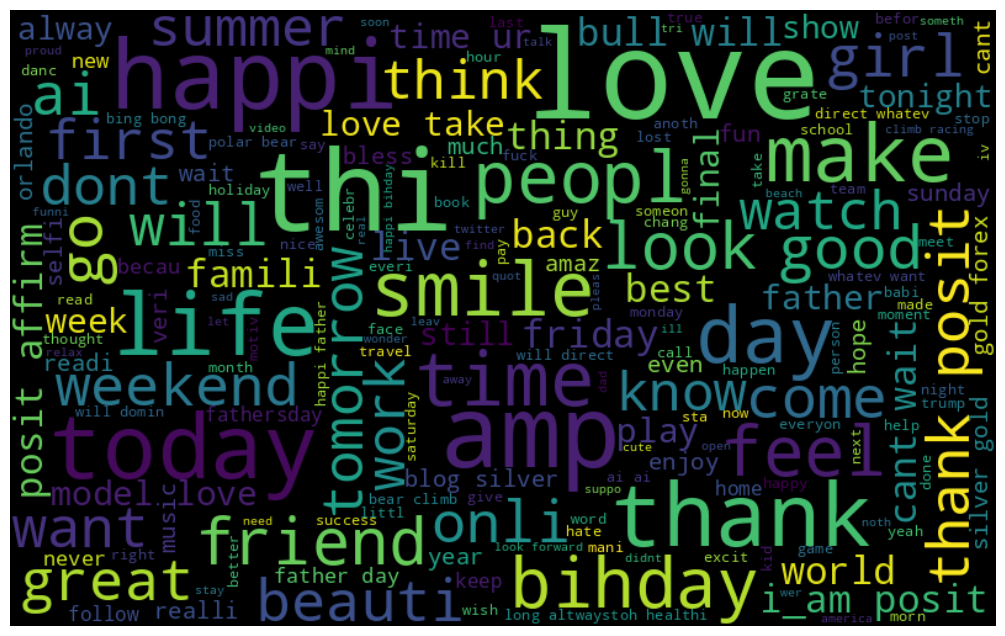

In [57]:
#frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

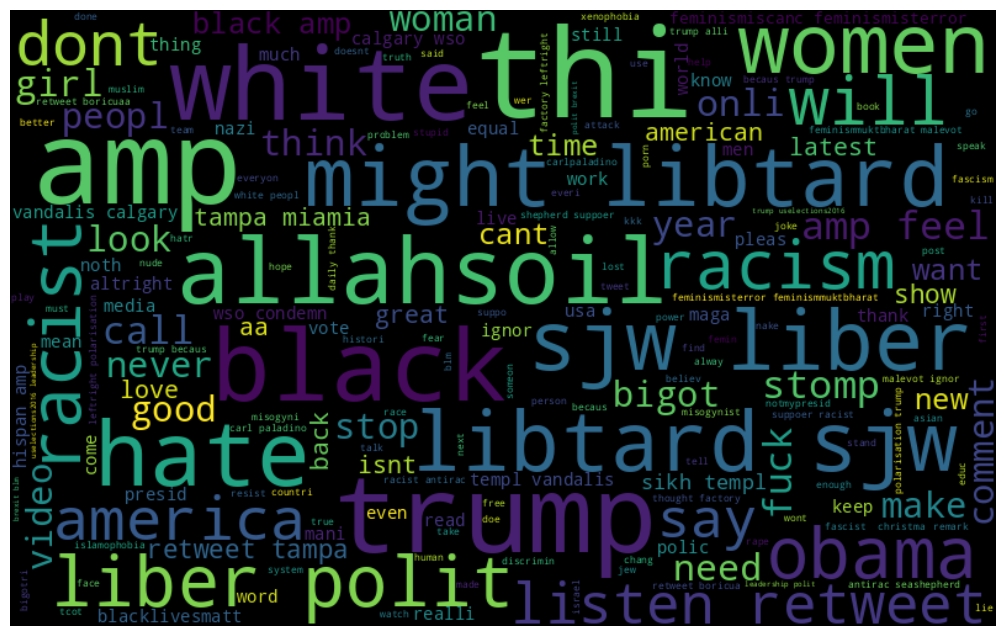

In [58]:
#frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
#extract the hashtag
def hashtag_extract(tweet):
  hashtags=[]
  #Loop words in the tweet
  for word in tweet:
    ht = re.findall(r'#(\w+)', word)
    hashtags.append(ht)
  return hashtags

In [63]:
#extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

#extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [66]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [67]:
#unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [69]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [70]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


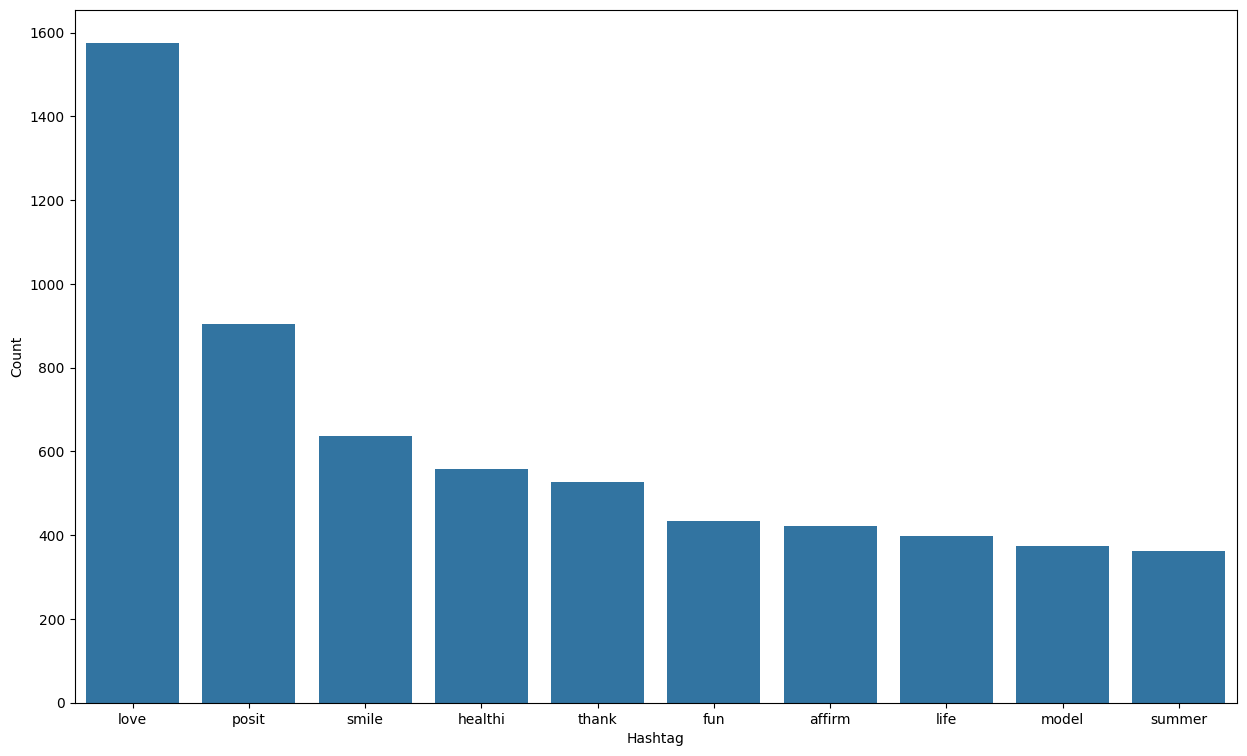

In [73]:
#select top 10 hashtags
d= d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [74]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


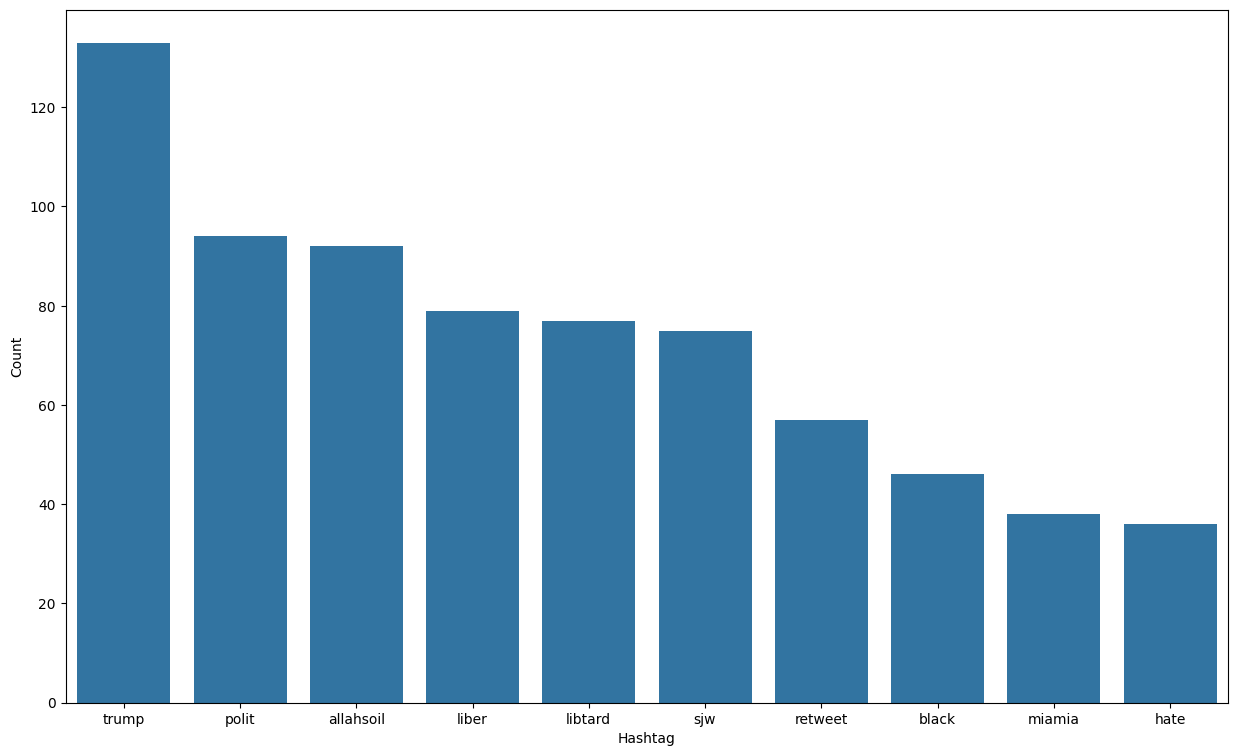

In [75]:
#select top 10 hashtags
d= d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

FEATURE EXTRACTION

In [76]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [78]:
# bow[0].toarray()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

MODEL TRAINING

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [82]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [84]:
pred = model.predict(X_test)
f1_score(y_test, pred)

0.5071428571428571

In [85]:
accuracy_score(y_test, pred)

0.9481917156801402

In [87]:
#Use Probability to Get Output
pred_prob = model.predict_proba(X_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int64)

f1_score(y_test, pred)

0.5675146771037183

In [88]:
accuracy_score(y_test, pred)

0.9446877737454636

In [89]:
pred_prob[0][1] >= 0.3

False